# Define Libraries

In [2]:
import cv2  # Import OpenCV library for image processing
import matplotlib.pyplot as plt  # Import Matplotlib for image visualization
import numpy as np

# Image Negatives (Linear)

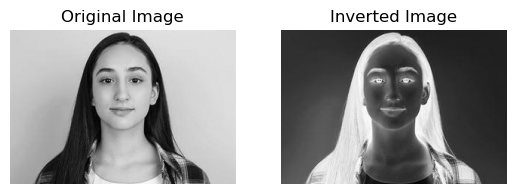

In [3]:
# Read the image in grayscale (0 indicates grayscale mode)
img = cv2.imread('ws1.jpg')

# Perform image inversion
L = 256  # Maximum pixel intensity value for 8-bit grayscale images (2^bit num)
s = (L - 1) - img  # Inversion formula: new_pixel = (L-1) - original_pixel

# Display the original and inverted images
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, position 1)
plt.imshow(img, cmap='gray')  # Show the original image in grayscale
plt.title('Original Image')  # Add title to the first image
plt.axis('off')


plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, position 2)
plt.imshow(s, cmap='gray')  # Show the inverted image in grayscale
plt.title('Inverted Image')  # Add title to the second image
plt.axis('off')

plt.show()  # Display the images


# Log Transformations for low intensity val

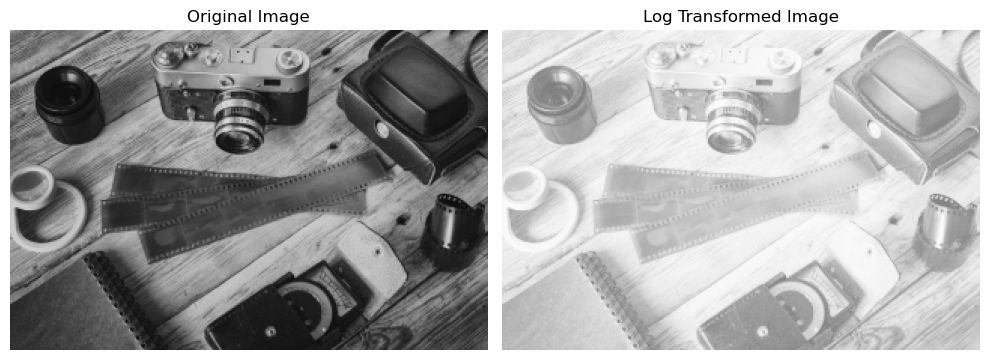

In [5]:
# Load the image in color mode.
img = cv2.imread('ws11.png')

# Apply log transformation to enhance low-intensity pixel values.
c = 255 / (np.log(1 + np.max(img)))  # Scaling constant based on max pixel intensity
log_transformed = c * np.log(1 + img)  # Log transform formula: s = c * log(1 + r)

# Convert the transformed image to 8-bit unsigned integer type.
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Save the log-transformed image to a file.
cv2.imwrite('log_transformed.jpg', log_transformed)

# Visualize the original and log-transformed images side by side.
plt.figure(figsize=(10, 5))  # Set up the figure size.

# Plot the original image.
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, position 1).
plt.title('Original Image')  # Add title to the plot.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display.
plt.axis('off')  # Turn off axis labels.

# Plot the log-transformed image.
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, position 2).
plt.title('Log Transformed Image')  # Add title to the plot.
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display.
plt.axis('off')  # Turn off axis labels.

# Adjust spacing between subplots and display the plots.
plt.tight_layout()  # Adjust layout to prevent overlapping.
plt.show()  # Display the figure.


# Power-Law (Gamma) Transformation

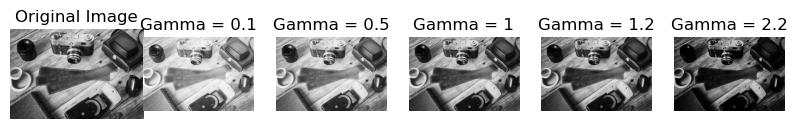

In [9]:
# قراءة الصورة
img = cv2.imread('ws11.png')

# تحويل الصورة إلى صورة رمادية (إذا كانت ملونة)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # تحويل الصورة من BGR إلى رمادي

# عرض الصورة الأصلية
plt.figure(figsize=(10, 5))  # إنشاء نافذة العرض بحجم معين
plt.subplot(1, len([0.1, 0.5, 1.2, 2.2]) + 1, 1)  # تحديد موضع الصورة الأولى
plt.imshow(img_gray, cmap='gray')  # عرض الصورة الرمادية
plt.title('Original Image')  # إضافة عنوان للصورة الأصلية
plt.axis('off')
# تجربة 4 قيم لـ Gamma
gamma_values = [0.1, 0.5,1, 1.2, 2.2]  # قائمة قيم غاما المراد تجربتها
for i, gamma in enumerate(gamma_values):
    # تطبيق تصحيح غاما باستخدام الصيغة: s = c * (r ^ gamma)
    gamma_corrected = np.array(255 * (img_gray / 255) ** gamma, dtype='uint8')  
    # تحويل الصورة المعالجة إلى النوع uint8 (للاحتفاظ بالقيم بين 0 و 255)
    
    # حفظ الصورة المحوَّلة على القرص
    cv2.imwrite(f'gamma_transformed_{gamma}.jpg', gamma_corrected)  # حفظ الصورة المحولة باسم مختلف
    
    # عرض الصورة بعد تطبيق تصحيح غاما
    plt.subplot(1, len(gamma_values) + 1, i + 2)  # تحديد موضع الصورة في النافذة
    plt.imshow(gamma_corrected, cmap='gray')  # عرض الصورة المعالجة
    plt.title(f'Gamma = {gamma}')  # إضافة عنوان يوضح قيمة غاما المستخدمة
    plt.axis('off')
# عرض الصور كلها معًا
plt.show()  # إظهار الصور في نافذة واحدة


# Piecewise-Linear Transformation Functions 

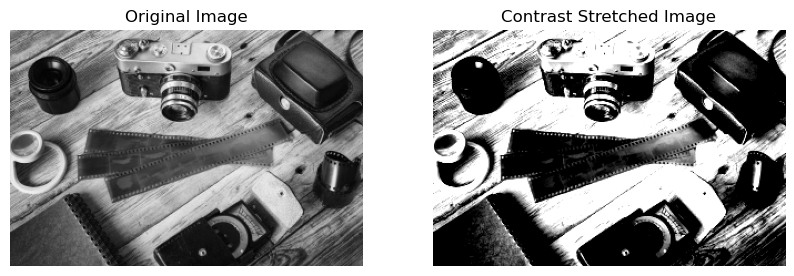

In [10]:
# Function to map each intensity level to the output intensity level based on contrast stretching formula.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):  # For pixel values between 0 and r1
        return (s1 / r1) * pix  # Linear mapping from [0, r1] to [0, s1]
    elif (r1 < pix and pix <= r2):  # For pixel values between r1 and r2
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1  # Linear mapping from [r1, r2] to [s1, s2]
    else:  # For pixel values greater than r2
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2  # Linear mapping from [r2, 255] to [s2, 255]

# فتح الصورة
img = cv2.imread('ws11.png')  # قراءة الصورة

# تحويل الصورة إلى صورة رمادية (إذا كانت الصورة ملونة)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # تحويل الصورة إلى تدرج الرمادي

# تحديد معايير التحويل (قيم r1, r2 تحدد مدى التباين، وقيم s1, s2 تحدد النتائج)
r1 = 70  # الحد الأدنى لمدى التباين الأصلي
s1 = 0   # الحد الأدنى للمخرجات
r2 = 140  # الحد الأعلى لمدى التباين الأصلي
s2 = 255  # الحد الأعلى للمخرجات

# تحويل الدالة لتعمل على كل قيمة في مصفوفة الصورة
pixelVal_vec = np.vectorize(pixelVal)  # استخدام np.vectorize لتطبيق الدالة على كل بكسل

# تطبيق تمدد التباين
contrast_stretched = pixelVal_vec(img_gray, r1, s1, r2, s2)  # تطبيق الدالة على الصورة الرمادية

# حفظ الصورة المعدلة
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)  # حفظ الصورة الناتجة

# عرض الصورة الأصلية والصورة المعدلة
plt.figure(figsize=(10, 5))  # إنشاء نافذة بحجم معين

# عرض الصورة الأصلية
plt.subplot(1, 2, 1)  # إنشاء نافذة فرعية (صف واحد، عمودان، الموضع الأول)
plt.imshow(img_gray, cmap='gray')  # عرض الصورة الرمادية
plt.title('Original Image')  # إضافة عنوان
plt.axis('off')
# عرض الصورة المعدلة (بعد تمديد التباين)
plt.subplot(1, 2, 2)  # إنشاء نافذة فرعية (صف واحد، عمودان، الموضع الثاني)
plt.imshow(contrast_stretched, cmap='gray')  # عرض الصورة بعد تمديد التباين
plt.title('Contrast Stretched Image')  # إضافة عنوان
plt.axis('off')
# عرض الصور
plt.show()  # إظهار النافذة
